In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv("Mall_Customers.csv")

In [5]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [7]:
X = dataset.iloc[:,[3,4]].values

In [9]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [86]:
from sklearn.cluster import SpectralClustering
sclustering = SpectralClustering(n_clusters = 5,eigen_solver='arpack',assign_labels='kmeans')
y_kmeans = sclustering.fit_predict(X)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:427: UserWarning: Exited at iteration 2000 with accuracies 
[5.14447362e-15 5.71860567e-07 5.27558830e-07 1.07523317e-06
 1.09451255e-06 3.44456331e-06]
not reaching the requested tolerance 2.9802322387695312e-06.
Use iteration 1999 instead with accuracy 
1.0640505514022314e-06.

  _, diffusion_map = lobpcg(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:427: UserWarning: Exited postprocessing with accuracies 
[3.42295535e-15 5.70431786e-07 5.27173434e-07 1.06932138e-06
 1.09510213e-06 3.12227492e-06]
not reaching the requested tolerance 2.9802322387695312e-06.
  _, diffusion_map = lobpcg(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.wa

In [88]:
supervised = pd.DataFrame(dataset)

In [90]:
supervised["Cluster_group"]=y_kmeans

In [92]:
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,4
1,2,Male,21,15,81,4
2,3,Female,20,16,6,4
3,4,Female,23,16,77,4
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,4
196,197,Female,45,126,28,3
197,198,Male,32,126,74,4
198,199,Male,32,137,18,1


In [94]:
supervised.to_csv("cluster.csv",index=False)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


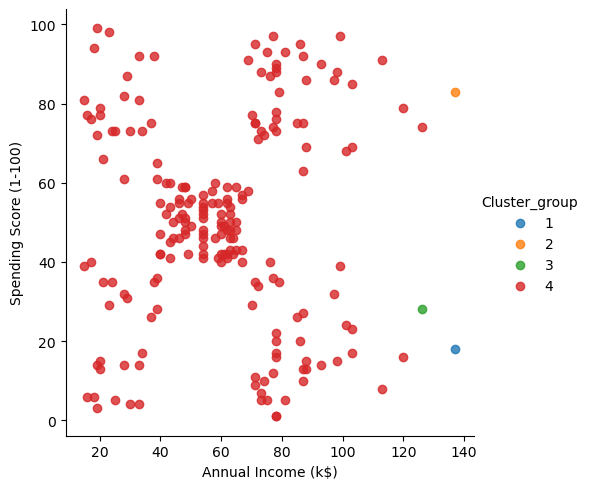

In [96]:
import seaborn as sns
facet = sns.lmplot(data=supervised, x=supervised.columns[3],y=supervised.columns[4],hue=supervised.columns[5],
            fit_reg=False, legend=True, legend_out=True)